In [1]:
import pandas as pd
import os
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import matplotlib

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
import pickle

In [3]:
import ASTRA_plots_utils
import plotting_utils
import predictions_evaluations
import utils

In [4]:
fleet_size = 14000
path = f'/cluster/scratch/mfrancesc/IVT/SA_scenario/zurich/astra_5km_100pct/fleet_{fleet_size}'
path_copy = f'/cluster/scratch/mfrancesc/IVT/SA_scenario/zurich/astra_5km_100pct_copy/fleet_{fleet_size}'

In [5]:
#last_iter = 60
#methods = ['markov','msa02','mw5']

In [6]:
data_global = {}
for m in ['markov']:
    data_global[m] = ASTRA_plots_utils.read_output(
        os.path.join(path_copy,"global"),
        last_iter=89
    )

100%|██████████| 90/90 [02:02<00:00,  1.36s/it]


In [7]:
data_fixed = ASTRA_plots_utils.read_output(
        os.path.join(path_copy,"fixed"),
        last_iter=100
    )

100%|██████████| 101/101 [01:50<00:00,  1.09s/it]


In [8]:
data_dynamic_CN = {}
data_dynamic_CN['markov'] = {}
data_dynamic_CN['msa02'] = {}
data_dynamic_CN['mw5'] = {}

data_dynamic_CN['markov'][10] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k10"),
                last_iter=88
                )
data_dynamic_CN['markov'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k25"),
                last_iter=97
                )
data_dynamic_CN['markov'][50] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k50"),
                last_iter=67
                )
data_dynamic_CN['markov'][100] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k100"),
                last_iter=90
                )

data_dynamic_CN['msa02'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", 'msa02', "k25_v2"),
                last_iter=94
                )
data_dynamic_CN['mw5'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", 'mw5', "k25"),
                last_iter=95
                )

100%|██████████| 96/96 [02:21<00:00,  1.47s/it]


In [9]:
data_hex_500 = {}
data_hex_500['markov'] = ASTRA_plots_utils.read_output(
        os.path.join(path_copy,"hex","500_v2"),
        last_iter=98
        )

100%|██████████| 99/99 [02:27<00:00,  1.49s/it]


In [10]:
data_square_850 = {}
data_square_850['markov'] = ASTRA_plots_utils.read_output(
        os.path.join(path_copy,"square","850"),
        last_iter=93
        )

100%|██████████| 94/94 [02:18<00:00,  1.48s/it]


In [11]:
data_dynamic_FD = {}
data_dynamic_FD['markov'] = {}
data_dynamic_FD['markov'][500] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_FD", '500'),
            last_iter=87
            )

100%|██████████| 88/88 [02:06<00:00,  1.44s/it]


In [12]:
data_dynamic_PN = {}
data_dynamic_PN['markov'] = {}
data_dynamic_PN['markov'][0.1] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_PN", f"p0.1_km1000"),
            last_iter=93
            )
data_dynamic_PN['markov'][0.2] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_PN", f"p0.2_km1000"),
            last_iter=75
            )
data_dynamic_PN['markov'][0.3] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_PN", f"p0.3_km1000"),
            last_iter=95
            )

100%|██████████| 96/96 [02:28<00:00,  1.55s/it]


In [13]:
data = {}
data['global'] = data_global
data['fixed'] = data_fixed
data['dynamic_CN'] = data_dynamic_CN
data['hex_500'] = data_hex_500
data['square_850'] = data_square_850
data['dynamic_PN'] = data_dynamic_PN
data['dynamic_FD'] = data_dynamic_FD


In [14]:
write=False
if write:
    # this is just to save it in case scratch is deleted
    with open(os.path.join(path_copy, 'data_dict.pkl'), 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
read=False
if read:
    with open(os.path.join(path_copy, 'data_dict.pkl'), 'rb') as handle:
        data = pickle.load(handle)

In [16]:
compare_methods = [
    ("Fixed feedback", data['fixed'], 100),
    ("Global feedback", data['global']['markov'], 89),
    ("Square 850m", data['square_850']['markov'], 93),
    ("Hex 500m", data['hex_500']['markov'], 98),
    ("KNN-CN 10", data['dynamic_CN']['markov'][10], 88),
    ("KNN-CN 25", data['dynamic_CN']['markov'][25], 97),
    ("KNN-CN 50", data['dynamic_CN']['markov'][50], 67),
    ("KNN-CN 100", data['dynamic_CN']['markov'][100], 90),
    ("KNN-PN 0.1, 1000", data['dynamic_PN']['markov'][0.1], 93),
    ("KNN-PN 0.2, 1000", data['dynamic_PN']['markov'][0.2], 75),
    ("KNN-PN 0.3, 1000", data['dynamic_PN']['markov'][0.3], 95),
    ("FD 500", data['dynamic_FD']['markov'][500], 87)
]

In [17]:
t = plotting_utils.get_multiple_stats_table(compare_methods, add_iter=True)
t

Fixed feedback (it.100)  \
Number of rides                                            461482   
Wait time (min)                   Mean                    3.31537   
                                  Median                  2.06667   
                                  Std                     4.28094   
                                  75-perc                 4.16667   
                                  99-perc                 19.6532   
                                  Max                     128.717   
Travel time (min)                 Mean                    20.6394   
                                  Median                  15.8167   
                                  Std                     17.7393   
                                  75-perc                   28.05   
                                  99-perc                 83.4865   
                                  Max                     239.567   
Mean direct distance (km)                                 4.28623   
Average detour factor (time wise)                         1.44107   
Total execution time                             11 days 22:58:45   

                                          Global feedback (it.89)  \
Number of rides                                            646196   
Wait time (min)                   Mean                    4.23763   
                                  Median                  2.56667   
                                  Std                      5.4426   
                                  75-perc                     5.2   
                                  99-perc                 25.8333   
                                  Max                     184.767   
Travel time (min)                 Mean                    21.0268   
                                  Median                     15.6   
                                  Std                     19.3781   
                                  75-perc                    28.4   
                                  99-perc                 88.1175   
                                  Max                       338.4   
Mean direct distance (km)                                 4.10695   
Average detour factor (time wise)                         1.49577   
Total execution time                             14 days 05:12:21   

                                          Square 850m (it.93)  \
Number of rides                                        662826   
Wait time (min)                   Mean                3.41214   
                                  Median              2.31667   
                                  Std                 3.77237   
                                  75-perc             4.38333   
                                  99-perc             17.4667   
                                  Max                  151.15   
Travel time (min)                 Mean                 19.924   
                                  Median              14.9833   
                                  Std                 17.9974   
                                  75-perc             27.0667   
                                  99-perc             81.7667   
                                  Max                  303.05   
Mean direct distance (km)                             3.99898   
Average detour factor (time wise)                     1.47058   
Total execution time                         14 days 23:36:49   

                                           Hex 500m (it.98) KNN-CN 10 (it.88)  \
Number of rides                                      667397            658442   
Wait time (min)                   Mean              3.46113           3.50461   
                                  Median            2.33333              2.35   
                                  Std               3.89636           3.99026   
                                  75-perc           4.41667           4.48333   
                                  99-perc           18.1667           18.4333   
                     

In [18]:
t = t.drop('Total execution time', axis=0, level=0)
t = t.astype('float')
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{llrrrrrrrrrrrr}
\toprule
                                  &     &  Fixed feedback (it.100) &  Global feedback (it.89) &  Square 850m (it.93) &  Hex 500m (it.98) &  KNN-CN 10 (it.88) &  KNN-CN 25 (it.97) &  KNN-CN 50 (it.67) &  KNN-CN 100 (it.90) &  KNN-PN 0.1, 1000 (it.93) &  KNN-PN 0.2, 1000 (it.75) &  KNN-PN 0.3, 1000 (it.95) &  FD 500 (it.87) \\
\midrule
\textbf{Number of rides} & {} &                461482.00 &                646196.00 &            662826.00 &         667397.00 &          658442.00 &          666961.00 &          622737.00 &           658986.00 &                 659394.00 &                 634759.00 &                 650430.00 &       655821.00 \\
\textbf{Wait time (min)} & \textbf{Mean} &                     3.32 &                     4.24 &                 3.41 &              3.46 &               3.50 &               3.49 &               3.48 &                3.44 &                  

In [19]:
compare_methods_smoothing = [
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], 97-1),
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], 97),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], 94-1),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], 94),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], 95-1),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], 95)
]

In [20]:
t = plotting_utils.get_multiple_stats_table(compare_methods_smoothing, add_iter=True)
t

KNN-CN 25 Markov (it.96)  \
Number of rides                                             666280   
Wait time (min)                   Mean                     3.44877   
                                  Median                   2.33333   
                                  Std                      3.79577   
                                  75-perc                     4.45   
                                  99-perc                    17.65   
                                  Max                      116.533   
Travel time (min)                 Mean                     20.1125   
                                  Median                   15.0333   
                                  Std                      18.2536   
                                  75-perc                     27.3   
                                  99-perc                    83.85   
                                  Max                       294.85   
Mean direct distance (km)                                  4.00189   
Average detour factor (time wise)                          1.47807   
Total execution time                              14 days 22:32:32   

                                          KNN-CN 25 Markov (it.97)  \
Number of rides                                             666961   
Wait time (min)                   Mean                     3.49126   
                                  Median                   2.33333   
                                  Std                      4.01997   
                                  75-perc                  4.43333   
                                  99-perc                     18.6   
                                  Max                       123.85   
Travel time (min)                 Mean                     20.2997   
                                  Median                   15.0333   
                                  Std                      18.6871   
                                  75-perc                    27.35   
                                  99-perc                    87.99   
                                  Max                      303.267   
Mean direct distance (km)                                  4.00573   
Average detour factor (time wise)                          1.49127   
Total execution time                              14 days 22:32:32   

                                          KNN-CN 25 MSA=0.2 (it.93)  \
Number of rides                                              660369   
Wait time (min)                   Mean                      3.41708   
                                  Median                    2.31667   
                                  Std                       3.79529   
                                  75-perc                   4.38333   
                                  99-perc                   17.4833   
                                  Max                         126.5   
Travel time (min)                 Mean                      19.9016   
                                  Median                    14.9333   
                                  Std                       17.8704   
                                  75-perc                     27.05   
                                  99-perc                   82.0333   
                                  Max                       296.183   
Mean direct distance (km)                                     3.991   
Average detour factor (time wise)                           1.47253   
Total execution time                               14 days 10:38:37   

                                          KNN-CN 25 MSA=0.2 (it.94)  \
Number of rides                                              661470   
Wait time (min)                   Mean                      3.47397   
                                  Median                    2.33333   
                                  Std                       4.01155   
                                  75-perc                   4.43333   
                          

In [21]:
t = t.drop('Total execution time', axis=0, level=0)
t = t.astype('float')
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{llrrrrrr}
\toprule
                                  &     &  KNN-CN 25 Markov (it.96) &  KNN-CN 25 Markov (it.97) &  KNN-CN 25 MSA=0.2 (it.93) &  KNN-CN 25 MSA=0.2 (it.94) &  KNN-CN 25 MW=5 (it.94) &  KNN-CN 25 MW=5 (it.95) \\
\midrule
\textbf{Number of rides} & {} &                 666280.00 &                 666961.00 &                  660369.00 &                  661470.00 &               661617.00 &               662941.00 \\
\textbf{Wait time (min)} & \textbf{Mean} &                      3.45 &                      3.49 &                       3.42 &                       3.47 &                    3.52 &                    3.44 \\
                                  & \textbf{Median} &                      2.33 &                      2.33 &                       2.32 &                       2.33 &                    2.33 &                    2.32 \\
                                  & \textbf{Std} &   

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
Fixed feedback (it.100),23500,-6.591862,4.572044,-9.983333,-9.266667,-7.916667,-5.750000,0.600000,10.950167,111.416667,6.000000,8.000000,9.416667,9.483333,10.950167,3.190560,64.355339,8.022178,7.360412,94.314894
Global feedback (it.89),33492,0.059919,5.378917,-4.206348,-3.056348,-1.623015,1.060319,9.693652,21.426985,78.093652,1.489681,2.639681,3.706348,9.693652,21.426985,4.202359,28.935479,5.379171,3.357924,68.090887
Square 850m (it.93),34278,-0.009105,3.464833,-26.415686,-1.863233,-0.684724,1.064250,5.766957,11.703123,95.958553,0.811290,1.651307,2.743431,6.361111,11.939439,2.644565,12.004803,3.464795,2.238543,61.765564
Hex 500m (it.98),33782,0.028168,3.445560,-30.031373,-1.842951,-0.655466,1.098909,6.015742,12.164818,78.193561,0.802969,1.639023,2.738802,6.552060,12.352406,2.604666,11.872327,3.445624,2.255668,61.473566
KNN-CN 10 (it.88),34097,0.153392,3.657134,-23.531667,-1.757090,-0.553333,1.219822,6.138333,13.365803,87.905979,0.769786,1.590745,2.806220,6.658898,13.688430,2.846737,13.397769,3.660296,2.300839,59.973018
KNN-CN 25 (it.97),33688,0.113018,3.641318,-21.637551,-1.799988,-0.638335,1.178204,6.083802,12.864929,72.303333,0.812285,1.633417,2.764124,6.621714,13.176950,2.828747,13.271574,3.643017,2.295597,61.125623
KNN-CN 50 (it.67),33440,0.006239,3.511016,-22.205333,-1.986137,-0.811963,1.142533,6.190312,12.042559,70.450947,0.914526,1.786909,2.886457,6.513970,12.294984,2.600061,12.326903,3.510969,2.359361,62.757177
KNN-CN 100 (it.90),34562,-0.000351,3.467804,-20.332833,-1.918754,-0.801757,1.050322,5.925097,12.230331,98.644132,0.887661,1.710109,2.739450,6.283082,12.363250,2.617199,12.025317,3.467754,2.274992,62.968000
"KNN-PN 0.1, 1000 (it.93)",34113,0.025308,3.601077,-14.004729,-1.946546,-0.826897,1.048319,6.178853,12.489342,94.789217,0.898799,1.766122,2.755201,6.527225,12.537461,2.748281,12.968019,3.601114,2.327008,63.412775
"KNN-PN 0.2, 1000 (it.75)",33630,0.028308,3.857359,-12.143822,-2.050870,-0.878068,1.102816,6.299577,13.212560,72.705661,0.952363,1.845515,2.861365,6.543624,13.212560,3.002467,14.879577,3.857405,2.421728,63.705025


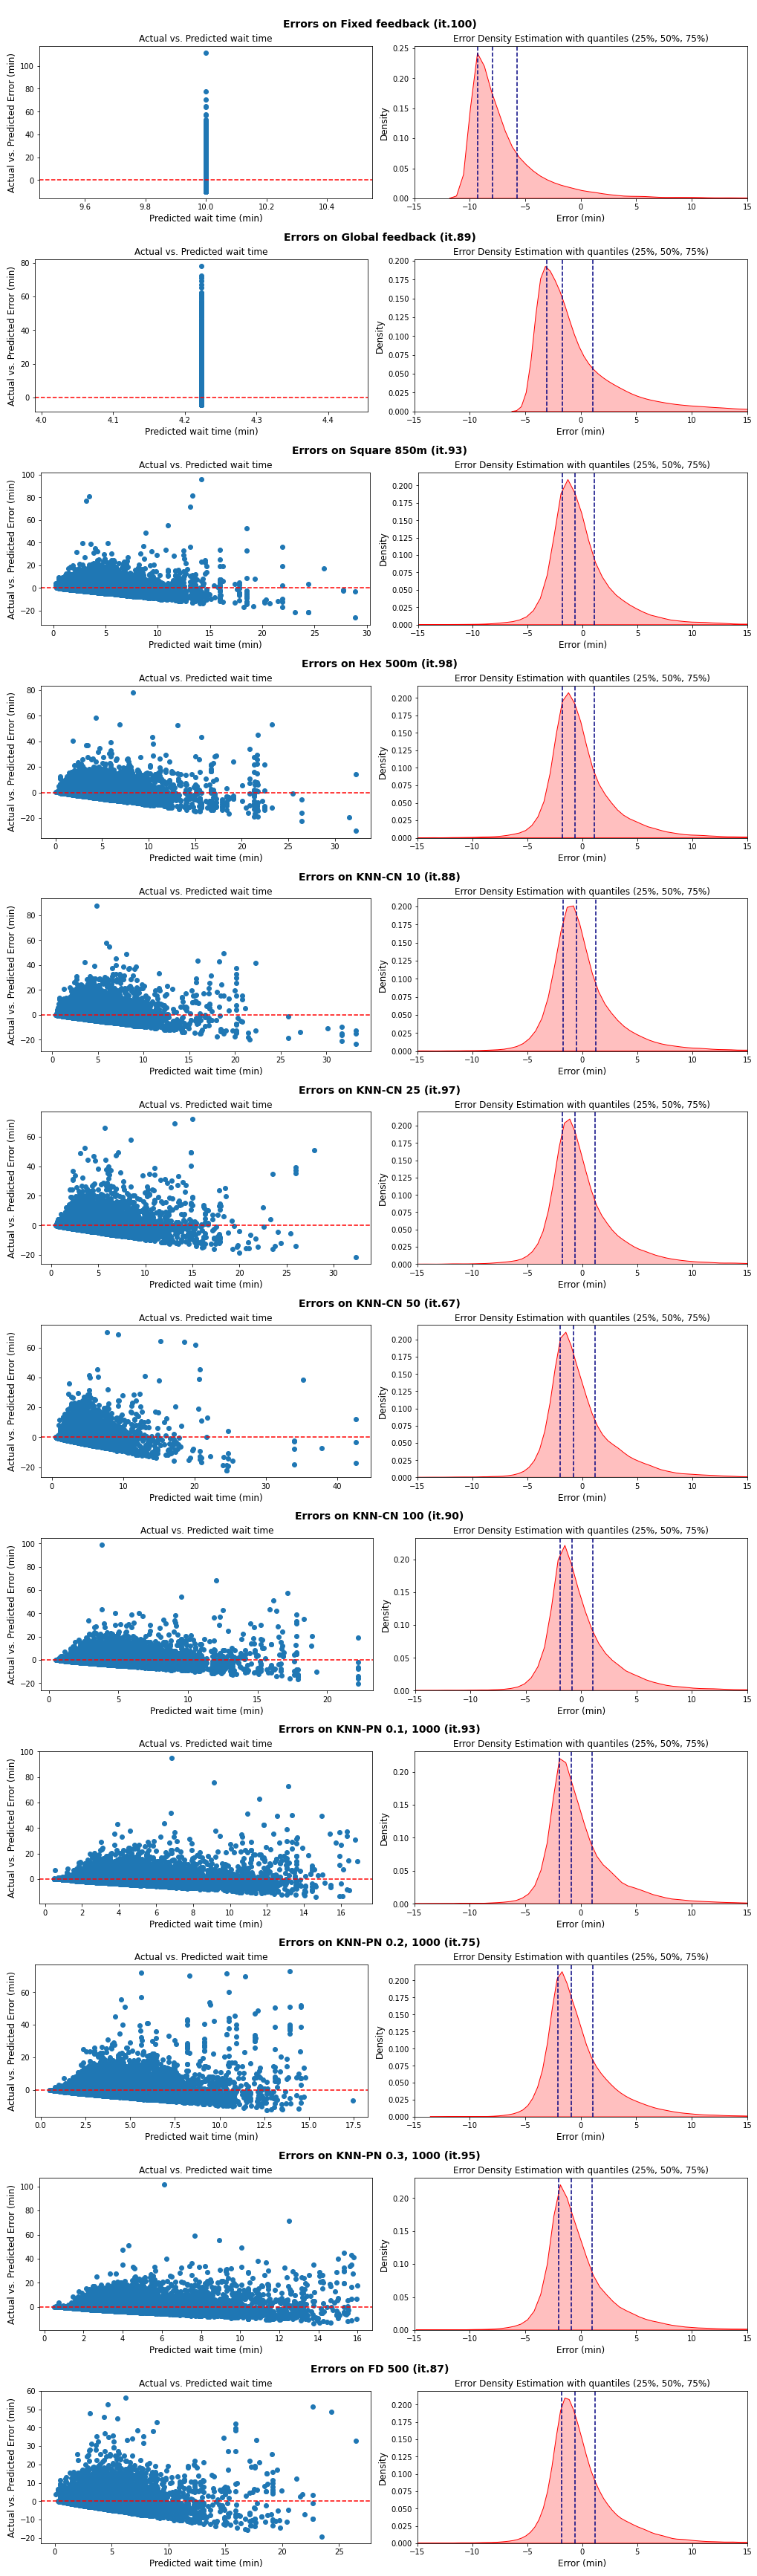

In [22]:
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True
)

In [23]:
t = table_compare_methods.copy(deep=True)
t = t.drop(columns=['min', '25%', '50%', '75%', '95%', '99%', 'max', 'MSE'])
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  count &  mean &   std &  25\% abs error &  50\% abs error &  75\% abs error &  95\% abs error &  99\% abs error &  std abs error &  RMSE &   MAE &  \% errors < 0 (overestimated) \\
\midrule
\textbf{Fixed feedback (it.100) } &  23500 & -6.59 &  4.57 &           6.00 &           8.00 &           9.42 &           9.48 &          10.95 &           3.19 &  8.02 &  7.36 &                         94.31 \\
\textbf{Global feedback (it.89) } &  33492 &  0.06 &  5.38 &           1.49 &           2.64 &           3.71 &           9.69 &          21.43 &           4.20 &  5.38 &  3.36 &                         68.09 \\
\textbf{Square 850m (it.93)     } &  34278 & -0.01 &  3.46 &           0.81 &           1.65 &           2.74 &           6.36 &          11.94 &           2.64 &  3.46 &  2.24 &                         61.77 \\
\textbf{Hex 500m (it.98)        } &  33782 &  0.03 &  3.45 &    

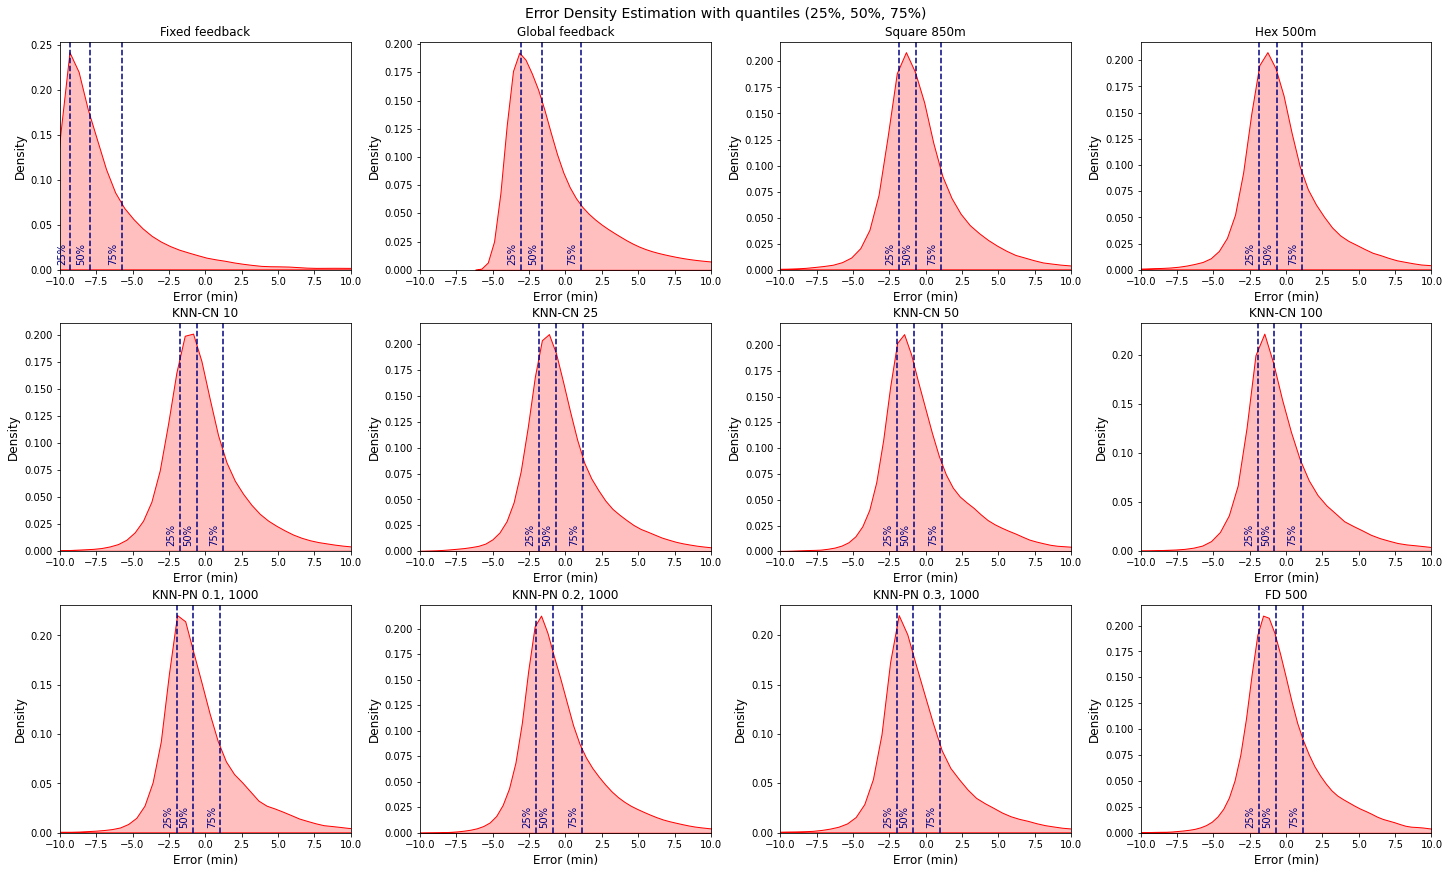

In [25]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods, 'waitTime', 3,4, kde_plot_limit=10, add_iteration_to_title=False, filename='figures_14000/error_kde.pdf')

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
KNN-CN 25 Markov (it.96),34483,0.013121,3.408927,-20.584667,-1.832899,-0.695002,1.096868,5.912528,12.268520,48.452053,0.826873,1.633663,2.746686,6.393607,12.582159,2.557152,11.620615,3.408902,2.254238,62.134965
KNN-CN 25 Markov (it.97),33688,0.113018,3.641318,-21.637551,-1.799988,-0.638335,1.178204,6.083802,12.864929,72.303333,0.812285,1.633417,2.764124,6.621714,13.176950,2.828747,13.271574,3.643017,2.295597,61.125623
KNN-CN 25 MSA=0.2 (it.93),34204,0.026400,3.424194,-24.176852,-1.858997,-0.719829,1.059814,5.963313,12.295440,83.057174,0.828736,1.647654,2.704168,6.342362,12.526502,2.596031,11.725462,3.424246,2.232954,62.533622
KNN-CN 25 MSA=0.2 (it.94),34003,0.087270,3.613995,-23.706211,-1.829230,-0.696029,1.111348,6.077040,12.632471,103.305270,0.825268,1.641384,2.711375,6.452996,13.074398,2.820505,13.068194,3.614996,2.261182,62.197453
KNN-CN 25 MW=5 (it.94),34044,0.156665,3.898228,-23.853912,-1.848515,-0.677612,1.157129,6.221246,13.574705,93.779826,0.835015,1.668887,2.739141,6.587176,13.702719,3.127180,15.220281,3.901318,2.332601,61.828810
KNN-CN 25 MW=5 (it.95),34247,0.038865,3.517448,-17.809296,-1.854488,-0.697189,1.054818,5.949671,11.880969,113.895685,0.812955,1.637191,2.697604,6.358714,11.990463,2.719929,12.373593,3.517612,2.230601,62.452186


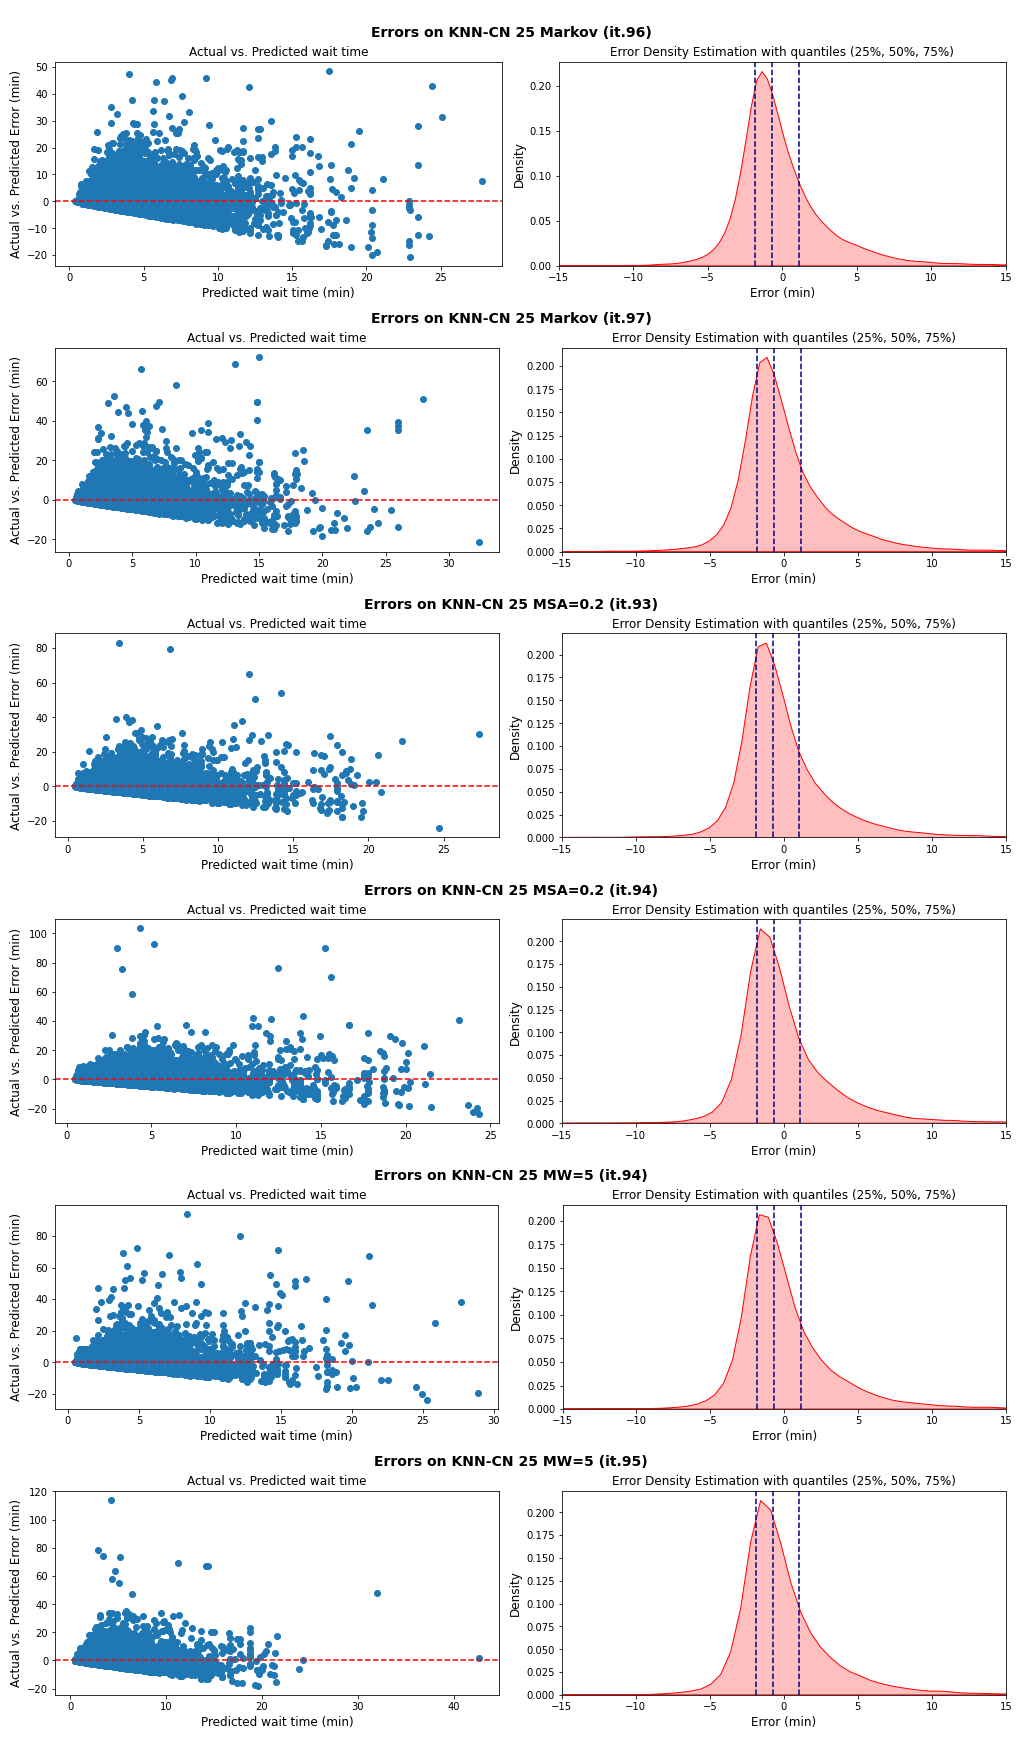

In [26]:
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods_smoothing, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True)

In [27]:
t = table_compare_methods.copy(deep=True)
t = t.drop(columns=['min', '25%', '50%', '75%', '95%', '99%', 'max', 'MSE'])
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  count &  mean &   std &  25\% abs error &  50\% abs error &  75\% abs error &  95\% abs error &  99\% abs error &  std abs error &  RMSE &   MAE &  \% errors < 0 (overestimated) \\
\midrule
\textbf{KNN-CN 25 Markov (it.96) } &  34483 &  0.01 &  3.41 &           0.83 &           1.63 &           2.75 &           6.39 &          12.58 &           2.56 &  3.41 &  2.25 &                         62.13 \\
\textbf{KNN-CN 25 Markov (it.97) } &  33688 &  0.11 &  3.64 &           0.81 &           1.63 &           2.76 &           6.62 &          13.18 &           2.83 &  3.64 &  2.30 &                         61.13 \\
\textbf{KNN-CN 25 MSA=0.2 (it.93)} &  34204 &  0.03 &  3.42 &           0.83 &           1.65 &           2.70 &           6.34 &          12.53 &           2.60 &  3.42 &  2.23 &                         62.53 \\
\textbf{KNN-CN 25 MSA=0.2 (it.94)} &  34003 &  0.09 &  3.61 &

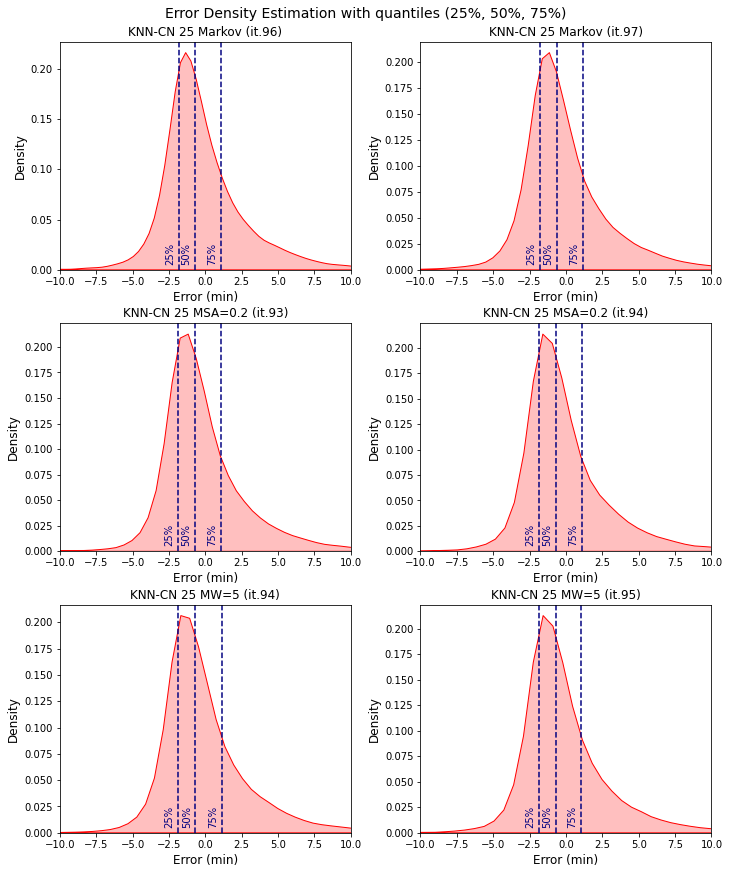

In [28]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods_smoothing, 'waitTime', 3,2, kde_plot_limit=10, add_iteration_to_title=True, filename='figures_14000/error_kde_smoothing.pdf')

In [29]:
t = predictions_evaluations.get_confidence_intervals_table(
    compare_methods, 'waitTime', add_iteration_to_title=True,
    confidence_intervals=[1,2,3,4,5,7.5,10])
t

,% trips with abs error < 1,% trips with abs error < 2,% trips with abs error < 3,% trips with abs error < 4,% trips with abs error < 5,% trips with abs error < 7.5,% trips with abs error < 10
Fixed feedback (it.100),2.685106,5.617021,8.876596,12.838298,17.936170,41.242553,98.829787
Global feedback (it.89),16.102353,35.757793,57.664517,85.990684,89.072017,92.959513,95.252598
Square 850m (it.93),30.526869,59.796371,78.475990,87.257133,91.787736,96.639244,98.272945
Hex 500m (it.98),30.936593,59.830679,78.521106,86.853946,91.229057,96.326446,98.132141
KNN-CN 10 (it.88),32.343021,60.216441,77.596269,86.359504,91.069596,96.087632,97.885444
KNN-CN 25 (it.97),30.672643,60.036215,78.262289,86.642128,91.160057,96.283543,98.097245
KNN-CN 50 (it.67),27.239833,55.995813,76.635766,86.366627,91.121411,96.300837,98.133971
KNN-CN 100 (it.90),28.432961,58.662693,78.655749,87.570164,91.944911,96.600312,98.258203
"KNN-PN 0.1, 1000 (it.93)",27.930701,57.916337,78.483276,87.136869,91.343476,96.362091,98.103362
"KNN-PN 0.2, 1000 (it.75)",26.238478,54.927148,77.151353,86.598275,91.296461,96.286054,98.093964


In [30]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods_confidence_intervals',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods_confidence_intervals}
\begin{tabular}{lrrrrrrr}
\toprule
{} &  \% trips with abs error < 1 &  \% trips with abs error < 2 &  \% trips with abs error < 3 &  \% trips with abs error < 4 &  \% trips with abs error < 5 &  \% trips with abs error < 7.5 &  \% trips with abs error < 10 \\
\midrule
\textbf{Fixed feedback (it.100) } &                        2.69 &                        5.62 &                        8.88 &                       12.84 &                       17.94 &                         41.24 &                        98.83 \\
\textbf{Global feedback (it.89) } &                       16.10 &                       35.76 &                       57.66 &                       85.99 &                       89.07 &                         92.96 &                        95.25 \\
\textbf{Square 850m (it.93)     } &                       30.53 &                       59.80 &                       78.48 &                    

In [31]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("CN 25 markov", data['dynamic_CN']['markov'][25], c_gradient[0], '-'),
    ("CN 25 MSA = 0.2", data['dynamic_CN']['msa02'][25], c_gradient[1], '--'),
    ("CN 25 MW = 5", data['dynamic_CN']['mw5'][25], c_gradient[2], ':')
]


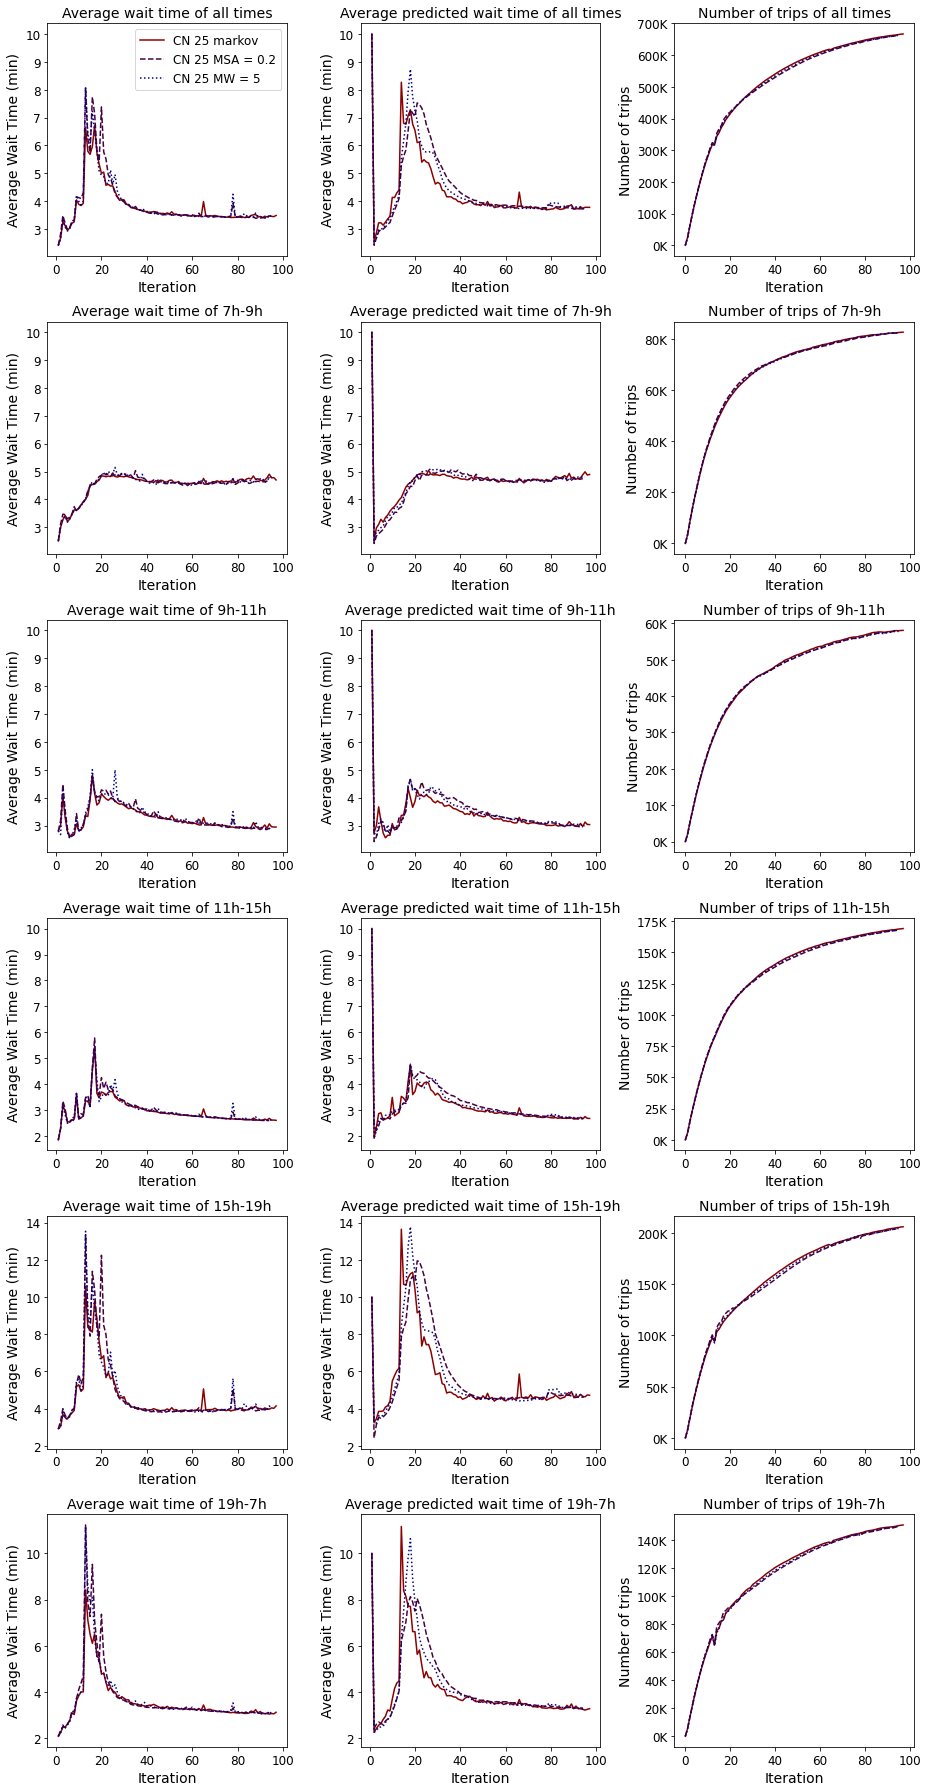

In [33]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color, save=True, filename='figures_14000/smoothing.pdf')